In [4]:
import numpy as np
import cv2
import face_recognition as fr
import matplotlib.pyplot as plt

# Measure Face Features

In [5]:
def measure_face(image_path):
    image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    face_landmarks_list = fr.face_landmarks(rgb_image)
    
    if not face_landmarks_list:
        print("No face detected.")
        return
    
    face_landmarks = face_landmarks_list[0]
    
    left_eye = np.array(face_landmarks['left_eye'])
    right_eye = np.array(face_landmarks['right_eye'])
    nose_bridge = np.array(face_landmarks['nose_bridge'])
    chin = np.array(face_landmarks['chin'])
    left_ear = np.array([chin[0], chin[1], chin[2]])  
    right_ear = np.array([chin[-1], chin[-2], chin[-3]])  
    
    eye_width = np.linalg.norm(left_eye[0] - left_eye[3])
    nose_length = np.linalg.norm(nose_bridge[0] - nose_bridge[-1])
    jaw_width = np.linalg.norm(chin[0] - chin[-1])
    left_ear_width = np.linalg.norm(left_ear[0] - left_ear[-1])
    right_ear_width = np.linalg.norm(right_ear[0] - right_ear[-1])
    
    trustworthiness = "Trustworthy" if abs(left_ear_width - right_ear_width) < 5 and eye_width > nose_length * 0.5 else "Untrustworthy"

    for feature in face_landmarks.keys():
        points = np.array(face_landmarks[feature])
        for point in points:
            cv2.circle(rgb_image, tuple(point), 7, (0, 255, 0), -1)  
    
    plt.figure(figsize=(8, 6))  
    plt.imshow(rgb_image)
    plt.title("Detected Face with Landmarks")
    plt.axis("off")
    plt.show()

    print(f"Eye Width: {eye_width:.2f} pixels")
    print(f"Nose Length: {nose_length:.2f} pixels")
    print(f"Jaw Width: {jaw_width:.2f} pixels")
    print(f"Left Ear Width: {left_ear_width:.2f} pixels")
    print(f"Right Ear Width: {right_ear_width:.2f} pixels")
    print(f"Person is: {trustworthiness}")

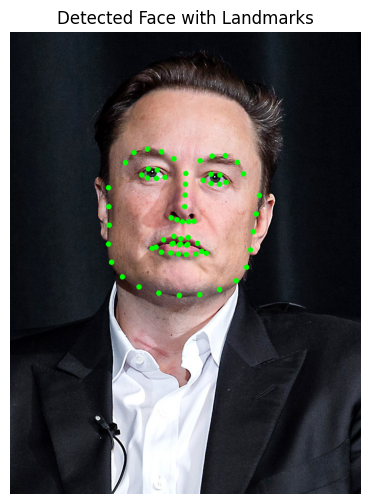

Eye Width: 60.30 pixels
Nose Length: 86.05 pixels
Jaw Width: 390.51 pixels
Left Ear Width: 97.02 pixels
Right Ear Width: 95.35 pixels
Person is: Trustworthy


In [7]:
image_path = r"Elon_Musk.jpg"
measure_face(image_path)
